Real world data distributions

In [1]:
#Create a function to plot the distribution of the data
def data_chart(raw_data):
    
    #import the library
    from matplotlib import pyplot as plt
    %matplotlib inline

    #Create the figure
    fig, ax = plt.subplots(2,1,figsize = (10,8))

    #Create the histogram
    ax[0].hist(raw_data)
    ax[0].set_ylabel('Grades Distribution')

    #Create the box plot
    ax[1].boxplot(raw_data, vert = False)
    ax[1].set_ylabel('Box Distribution')

    #Add measurement of central tendency
    ax[0].axvline(x=raw_data.mean(),color='cyan',linestyle= '-.',linewidth=2)
    ax[0].axvline(x=raw_data.mode()[0],color='yellow',linestyle= '-.',linewidth=2)
    ax[0].axvline(x=raw_data.median(),color='red',linestyle= '-.',linewidth=2)
    ax[0].axvline(x=raw_data.min(),color='gray',linestyle= '-.',linewidth=2)
    ax[0].axvline(x=raw_data.max(),color='gray',linestyle= '-.',linewidth=2)

    fig.suptitle('Grades Distribution')

    plt.show()

def show_cetral_tendency(raw_data):
    min = raw_data.min()
    max= raw_data.max()
    mean = raw_data.mean()
    mode = raw_data.mode()[0]
    median = raw_data.median()

    print(f"""
    minimum: {min}
    maximum: {max}
    median: {median}
    mode: {mode}
    mean: {mean:.2f}
    """)

def bell_plot(raw_data):
    from matplotlib import pyplot as plt
    %matplotlib inline

    #create the figure
    fig = plt.figure(figsize=(7,4))

    #create the plot
    raw_data.plot.density()

    #central tendency
    plt.axvline(x=raw_data.mean(),color='cyan',linestyle=':',linewidth=2)
    plt.axvline(x=raw_data.median(),color='red',linestyle=':',linewidth=2)
    plt.axvline(x=raw_data.mode()[0],color='yellow',linestyle=':',linewidth=2)

    plt.show()


Handle the DataFrame


    minimum: 3.0
    maximum: 97.0
    median: 49.5
    mode: 50.0
    mean: 49.18
    


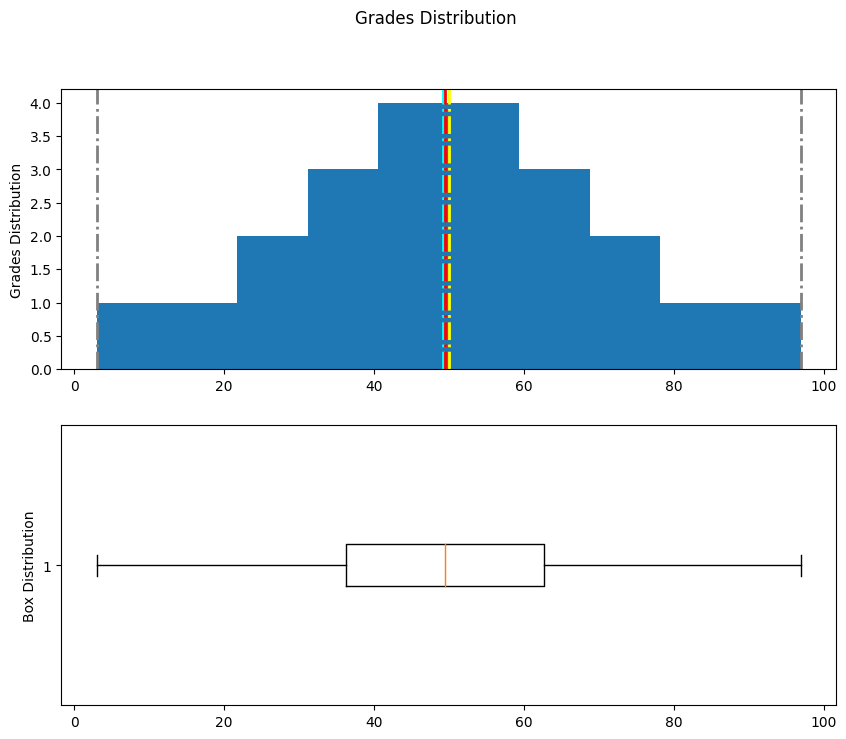

In [2]:
#create the DataFrame
import numpy as np
import pandas as pd

df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')
df_students = df_students.dropna(axis=0,how='any')

approved = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, approved.rename('Approved')], axis=1)

show_cetral_tendency(df_students['Grade'])
data_chart(df_students['Grade'])

The Grades data is wuite ideal, allof the data and the central tendecy, so now, let's check how the Study Hours performs


    minimum: 1.0
    maximum: 16.0
    median: 10.0
    mode: 9.0
    mean: 10.52
    


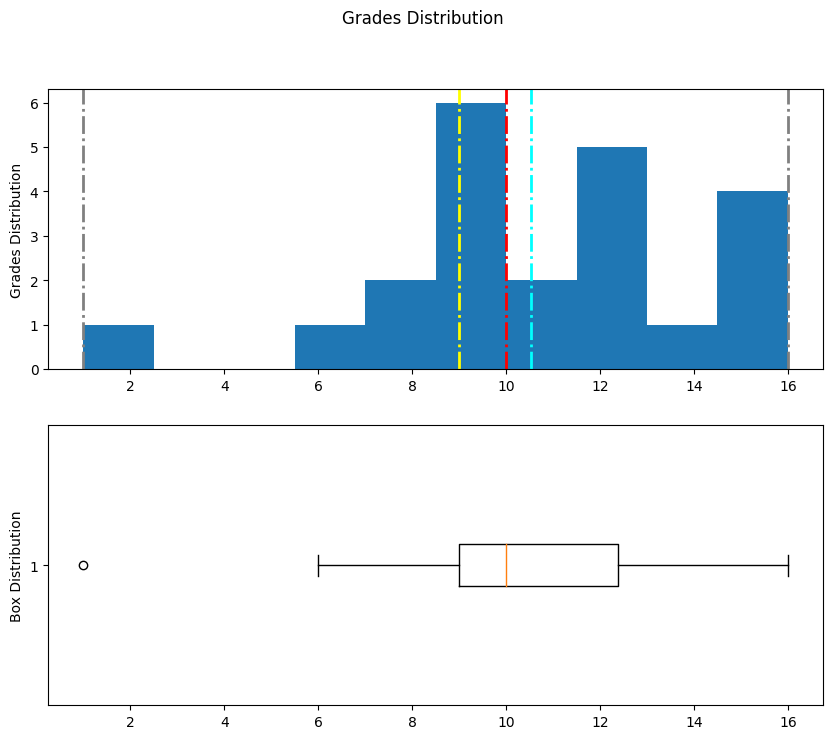

In [3]:
show_cetral_tendency(df_students['StudyHours'])
data_chart(df_students['StudyHours'])

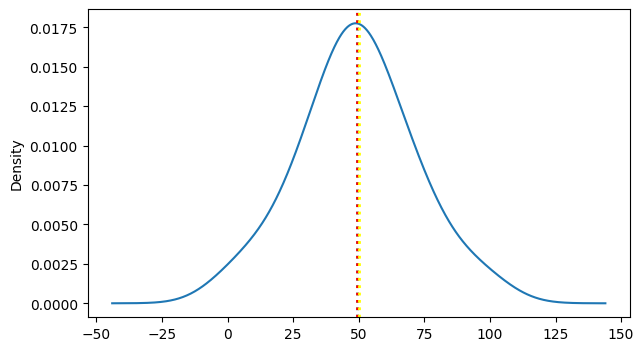

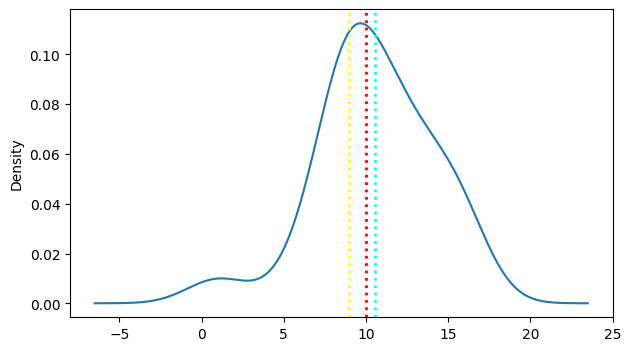

In [4]:
bell_plot(df_students['Grade'])
bell_plot(df_students['StudyHours'])

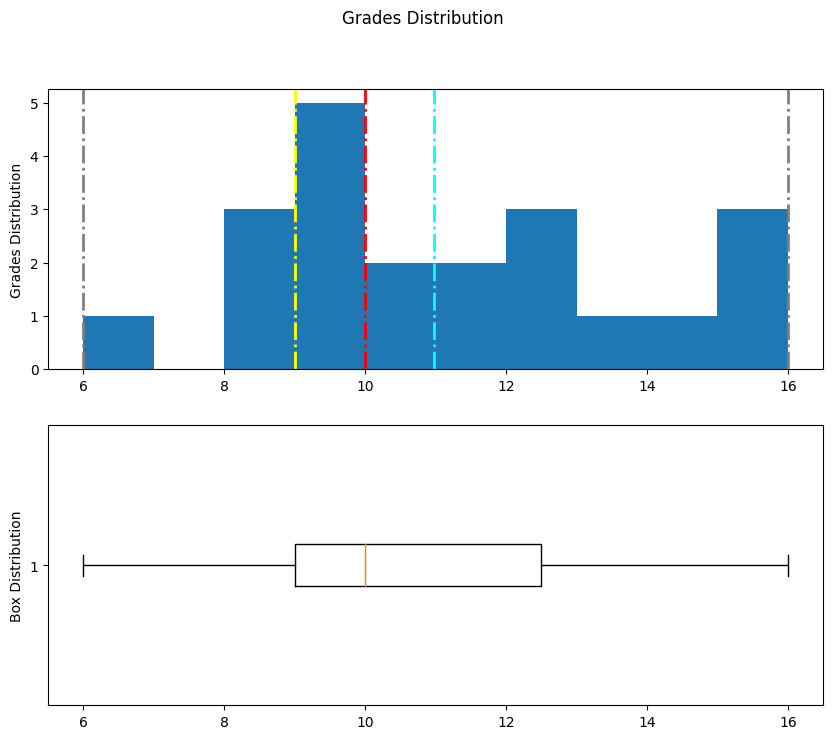


    minimum: 6.0
    maximum: 16.0
    median: 10.0
    mode: 9.0
    mean: 10.98
    


In [5]:
# from the box plot of the study hours we find that there is outlier around 1
# so let's see what happens when I remove that value

normal_sh = df_students[df_students['StudyHours'] > 4]['StudyHours']
data_chart(normal_sh)
show_cetral_tendency(normal_sh)


    minimum: 6.0
    maximum: 16.0
    median: 10.0
    mode: 9.0
    mean: 10.98
    


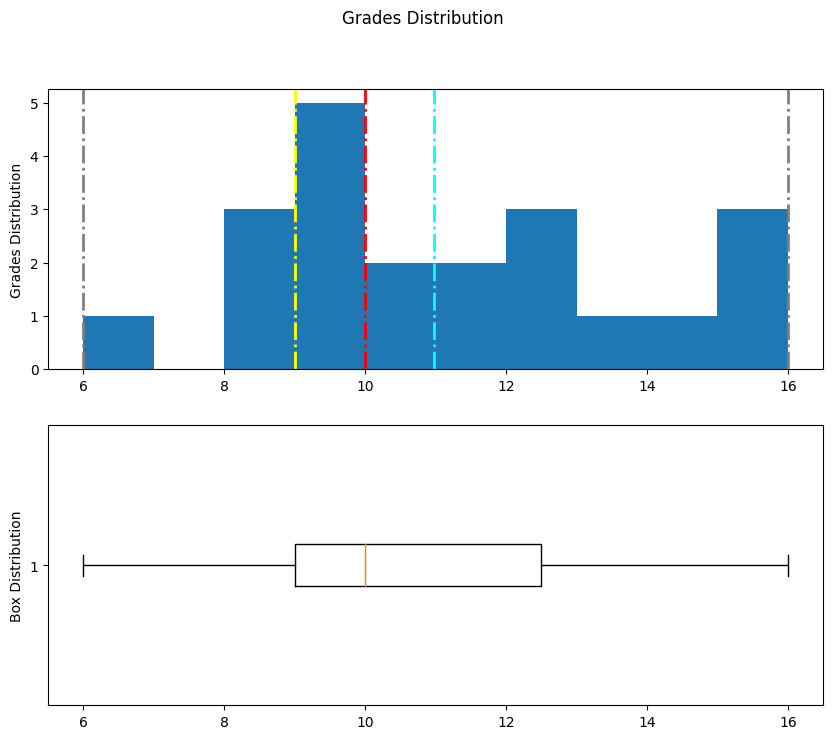

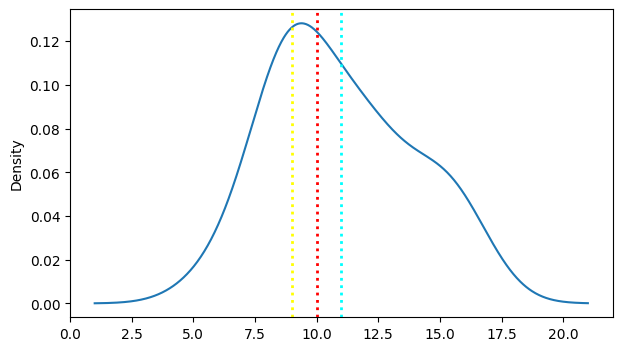

In [6]:
#the following code uses the Pandas quantile function to exclude 
# observations below the 0.01th percentile (the value above which 99% of the data reside).

#caculate the percintile
q01 = df_students['StudyHours'].quantile(0.01)

#Filter the DF with those values that are higher than the percentil
q99_sh = df_students[df_students['StudyHours'] > q01]['StudyHours']
show_cetral_tendency(q99_sh)
data_chart(q99_sh)
bell_plot(q99_sh)


This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

Measures of variance
how much variability is there in the data?

I want to know if all of the points are relatively similar, or if the they are irregular, if the difference is 
between point to point is signifincantly high. 

Range: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.
Variance: The average of the squared difference from the mean. You can use the built-in var function to find this.
Standard Deviation: The square root of the variance. You can use the built-in std function to find this.

In [7]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    range = col.max() - col.min()
    var = col.var()
    std = col.std()

    print(f'{col_name}:\n\t-Range: {range}\n\tVariance: {var:.2f}\n\tStandar: {std:.2f}\n-------------------')

Grade:
	-Range: 94.0
	Variance: 472.54
	Standar: 21.74
-------------------
StudyHours:
	-Range: 15.0
	Variance: 12.16
	Standar: 3.49
-------------------


When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight. Run the cell below to see the relationship between standard deviations and the data in the normal distribution.

Mean: 49.18 --> Standar Deviation: 21.737912


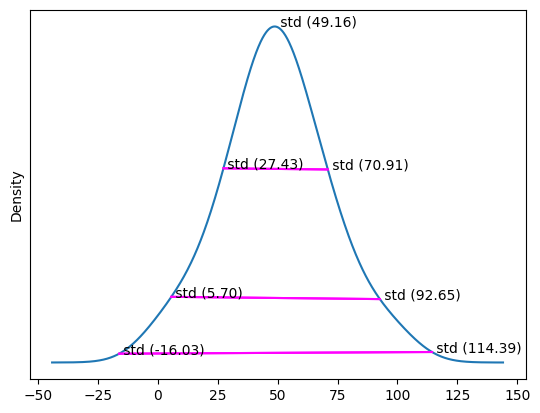

In [8]:
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

grades_col = df_students['Grade']

#get the density, bell distribution
density = sts.gaussian_kde(grades_col)
grades_col.plot.density()

#gte the mean and standar deviation
s = grades_col.std()
m = grades_col.mean()

print(f'Mean: {m:.2f} --> Standar Deviation: {s:2f}')

# annotate 1stdevs
x_vals = [-3,-2,-1,0,1,2,3]
for x_val in x_vals:
    x= [m-(s*x_val),m+(s*x_val)]
    y= density(x)

    plt.plot(x,y,color = 'magenta')
    plt.annotate(f' std ({x[1]-y[1]:.2f})',(x[1],y[1]))

plt.yticks([])
plt.show()


In [9]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Comparing data
Now that you know something about the statistical distribution of the data in your dataset, you're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [10]:
df_sample = df_students[df_students['StudyHours']>1]
df_removed = df_students[df_students['StudyHours']<=1]
print(df_removed)
print('\n','*'*25,'\n')
print(df_sample)

    Name  StudyHours  Grade  Approved
5  Vicky         1.0    3.0     False

 ************************* 

         Name  StudyHours  Grade  Approved
0         Dan       10.00   50.0     False
1       Joann       11.50   50.0     False
2       Pedro        9.00   47.0     False
3       Rosie       16.00   97.0      True
4       Ethan        9.25   49.0     False
6    Frederic       11.50   53.0     False
7      Jimmie        9.00   42.0     False
8      Rhonda        8.50   26.0     False
9    Giovanni       14.50   74.0      True
10  Francesca       15.50   82.0      True
11      Rajab       13.75   62.0      True
12    Naiyana        9.00   37.0     False
13       Kian        8.00   15.0     False
14      Jenny       15.50   70.0      True
15     Jakeem        8.00   27.0     False
16     Helena        9.00   36.0     False
17      Ismat        6.00   35.0     False
18      Anila       10.00   48.0     False
19       Skye       12.00   52.0     False
20     Daniel       12.50   63.0  

Here I would like to compare value, for different data types
to check if there is a relationship between the Grade column and the approved column

<Axes: title={'center': 'StudyHours'}, xlabel='Approved'>

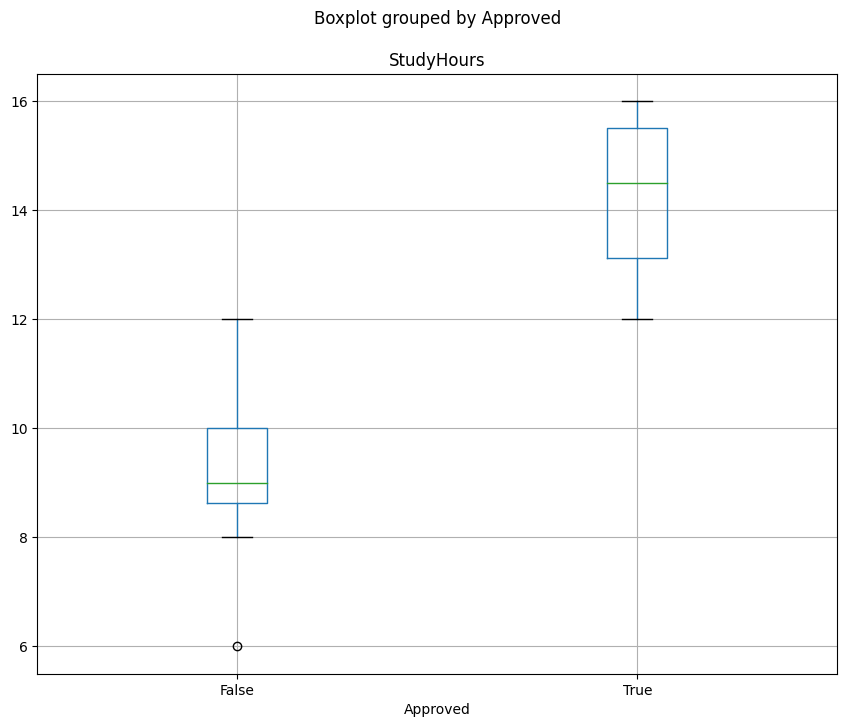

In [13]:
#First i will box plot both columns 

df_sample.boxplot(column='StudyHours',by='Approved', figsize= (10,8))

For the boxplot comparision, we have two boxes, the students that didn't pass were group by false in the 'Approved' column, we can see that the mayority of the students that resigned studied less than 10h per week, with a mean near to 9h. On the other hand those students that approved, studied around 13 to 15 hours per week, with a mean near to 14.8h. 

<Axes: xlabel='Name'>

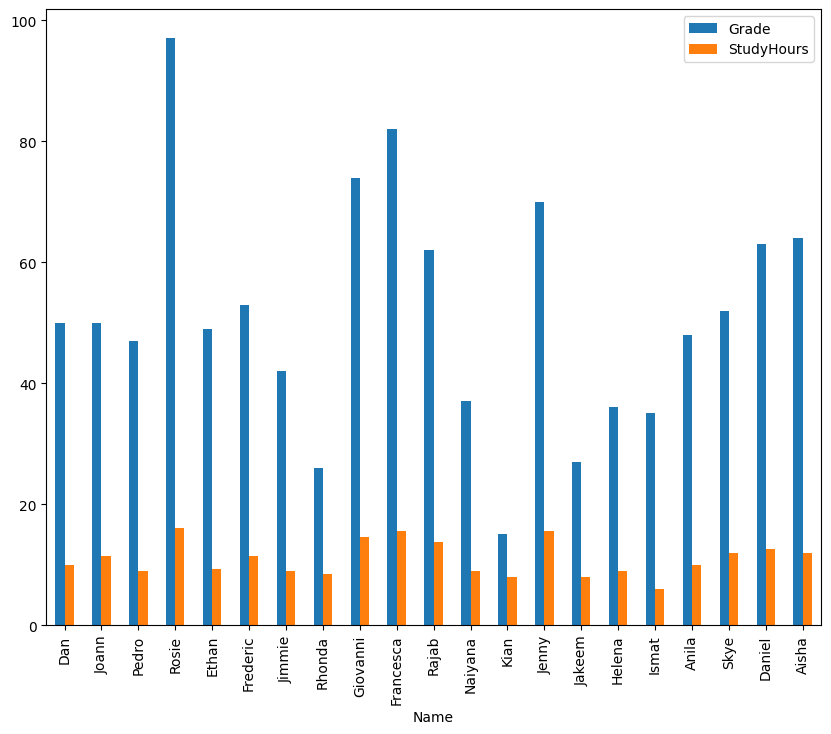

In [14]:
""" 
Now that I know that the students that pass more hours studying have more options to approve, 
I can compare the Study Hours with the Grades
"""

df_sample.plot(x='Name',y=['Grade','StudyHours'],kind = 'bar', figsize=(10,8))

It is difficult to read and get the insight of the graph since the scale for the grades is different thane the scale of study hours
It will be necesary to normalize the data, in order to do a fair comparision. 

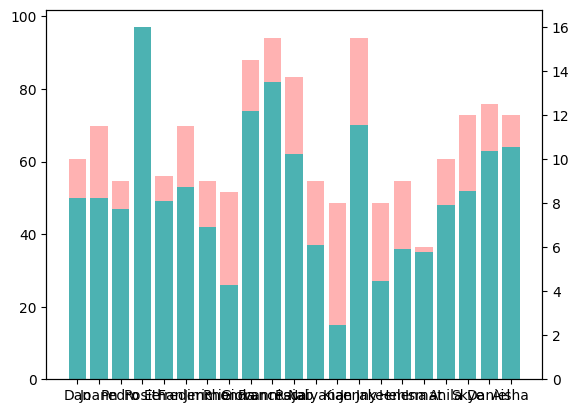

In [34]:
#Using secondary axis for the studyhours

fig, ax = plt.subplots()

ax.bar(df_sample['Name'],df_sample['Grade'], color= 'cyan')
ax2 = ax.twinx()
ax2.bar(df_sample['Name'],df_sample['StudyHours'],color= 'r', alpha=0.3)
plt.xticks(rotation= 90)

plt.show()

         Name     Grade  StudyHours
0         Dan  0.426829       0.400
1       Joann  0.426829       0.550
2       Pedro  0.390244       0.300
3       Rosie  1.000000       1.000
4       Ethan  0.414634       0.325
6    Frederic  0.463415       0.550
7      Jimmie  0.329268       0.300
8      Rhonda  0.134146       0.250
9    Giovanni  0.719512       0.850
10  Francesca  0.817073       0.950
11      Rajab  0.573171       0.775
12    Naiyana  0.268293       0.300
13       Kian  0.000000       0.200
14      Jenny  0.670732       0.950
15     Jakeem  0.146341       0.200
16     Helena  0.256098       0.300
17      Ismat  0.243902       0.000
18      Anila  0.402439       0.400
19       Skye  0.451220       0.600
20     Daniel  0.585366       0.650
21      Aisha  0.597561       0.600


<Axes: xlabel='Name'>

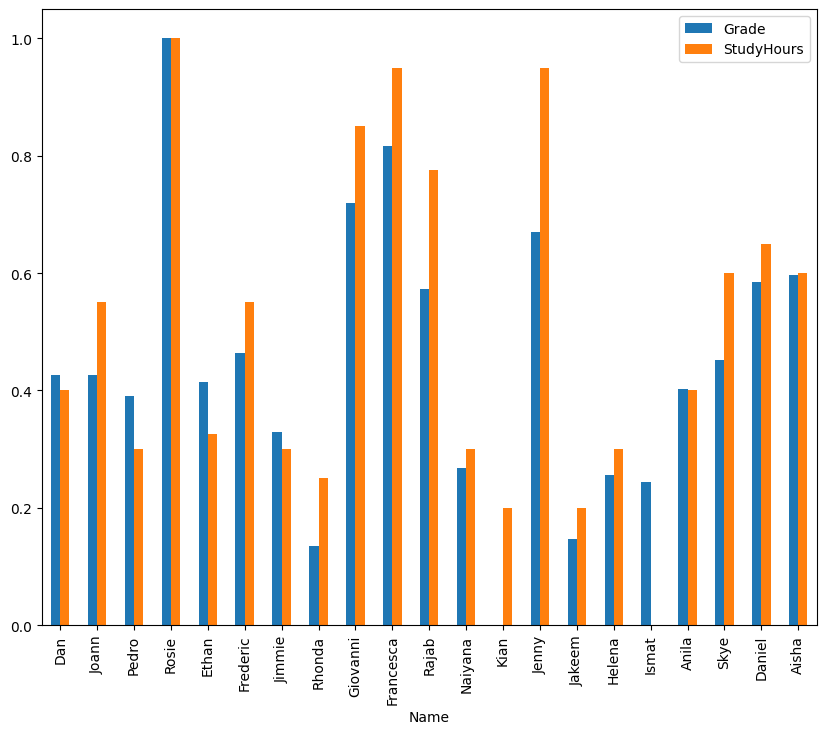

In [33]:
# Now instaed of using a seconday axis I will normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Normalize the data
df_normalized = df_sample[['Name','Grade','StudyHours']].copy()
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

print(df_normalized)

#Plot the normalized data
df_normalized.plot(x ='Name', y=['Grade','StudyHours'],kind= 'bar',figsize=(10,8))


So there seems to be a correlation between study time and grade. In fact, there's a statistical correlation measurement we can use to quantify the relationship between these columns.

In [36]:
ncorr_grade_sh = df_normalized['Grade'].corr(df_normalized['StudyHours'])
corr_grade_sh = df_sample['Grade'].corr(df_sample['StudyHours'])
print(f"Correlation with the data normalized: {ncorr_grade_sh:.4f}\nCorrelation with the raw data: {corr_grade_sh:.4f}")
print(f"Diference between correlations= {corr_grade_sh - ncorr_grade_sh:.2f}")

Correlation with the data normalized: 0.9118
Correlation with the raw data: 0.9118
Diference between correlations= -0.00


<Axes: title={'center': 'Study time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

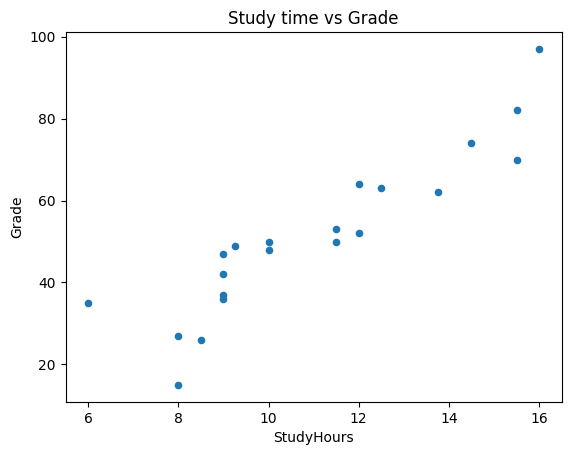

In [38]:
#another way to check correlation between variables is using a scatter plot

#create a scatter plot
df_sample.plot.scatter(title='Study time vs Grade',x='StudyHours',y='Grade')

A Regresion line will help us to check the correlation easly


Least squares regression

The difference between the original y (Grade) value and the f(x) value is the error between our regression line and the actual Grade achieved by the student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.

Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors—hence the name least squares regression.

In [43]:
# A Regresion line will help us to check the correlation easly

#Least squares regression

from scipy import stats

#Create a copy to do the regression
df_regresion= df_sample[['Grade','StudyHours']].copy()

#To find the line equation y = mx + b, I need to find m (slope) and b (intercept)
m,b,r,p,se = stats.linregress(df_regresion['StudyHours'],df_regresion['Grade'])
print(f'slope: {m:.4f}\nintercept: {b:.4f}')
print(f'Line equation => y = {m:.4f}*x + {b:.4f}')
print('\n','='*50,'\n')

# Add to the df_regresion the function result and calculate the error

df_regresion['f(x)'] = m*df_regresion['StudyHours'] + b
df_regresion['Error'] = df_regresion['Grade'] - df_regresion['f(x)']
df_regresion['sqrErr'] = df_regresion['Error']**2
print(df_regresion)


slope: 6.3134
intercept: -17.9164
Line equation => y = 6.3134*x + -17.9164


    Grade  StudyHours       f(x)      Error      sqrErr
0    50.0       10.00  45.217846   4.782154   22.868993
1    50.0       11.50  54.687985  -4.687985   21.977202
2    47.0        9.00  38.904421   8.095579   65.538403
3    97.0       16.00  83.098400  13.901600  193.254477
4    49.0        9.25  40.482777   8.517223   72.543085
6    53.0       11.50  54.687985  -1.687985    2.849293
7    42.0        9.00  38.904421   3.095579    9.582611
8    26.0        8.50  35.747708  -9.747708   95.017810
9    74.0       14.50  73.628262   0.371738    0.138189
10   82.0       15.50  79.941687   2.058313    4.236651
11   62.0       13.75  68.893193  -6.893193   47.516103
12   37.0        9.00  38.904421  -1.904421    3.626818
13   15.0        8.00  32.590995 -17.590995  309.443110
14   70.0       15.50  79.941687  -9.941687   98.837148
15   27.0        8.00  32.590995  -5.590995   31.259227
16   36.0        9.00  38.9

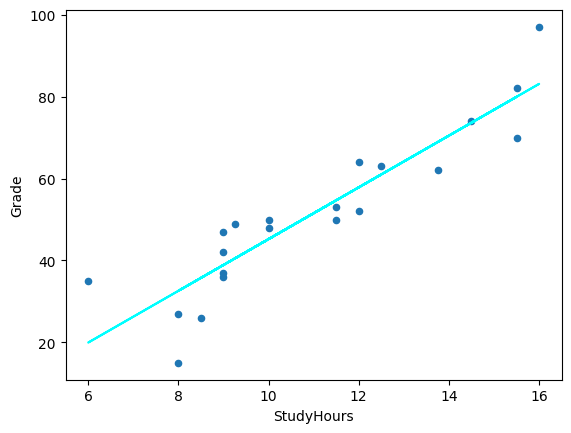

In [45]:
#Now plot the results

df_regresion.plot.scatter(x ='StudyHours', y= 'Grade')
plt.plot(df_regresion['StudyHours'],df_regresion['f(x)'], color = 'cyan')

plt.show()

The line follows and most of the grade values are close to it, therefore I can try to predict unknown values
in that range, taking into count that values in the middle tent to be closer than values in the extrems 

In [48]:
#build the function
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 11
grade_pred = f(study_time)

print(f'If you studied {study_time} hours per week, your grade could be {grade_pred:.2f} more or less')

If you studied 11 hours per week, your grade could be 51.53 more or less
